## Data visualization and data preprocessing

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

## 1. Loading the dataset

In [90]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [91]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [92]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [93]:
df.shape

(10000, 14)

## 2.Visualizations

## uni-variate Analysis

In [94]:
X = df.iloc[:,3:13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [95]:
y = df.iloc[:,13]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

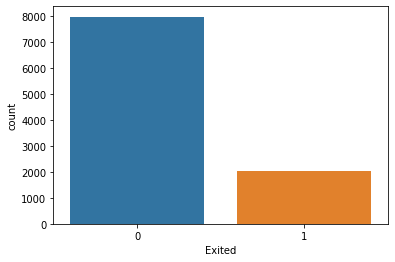

In [96]:
sns.countplot(x=y)

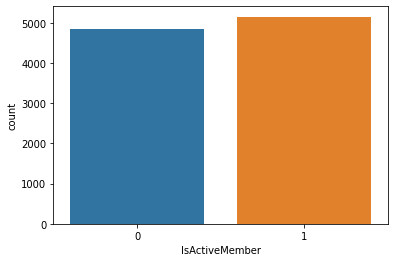

In [97]:
sns.countplot(x=df['IsActiveMember'])

## bi-variate Analysis

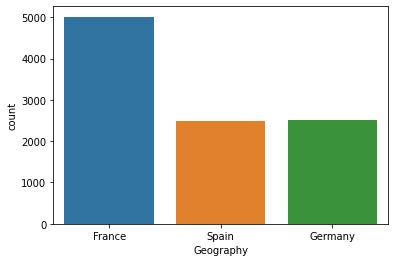

In [98]:
sns.countplot(x=X['Geography'])

Male      5457
Female    4543
Name: Gender, dtype: int64


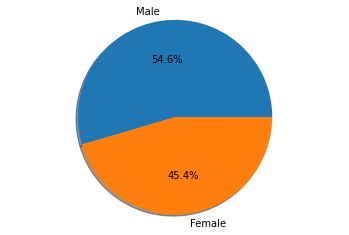

In [99]:
labels = ['Male','Female']
sizes = X['Gender'].value_counts()
print(sizes)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

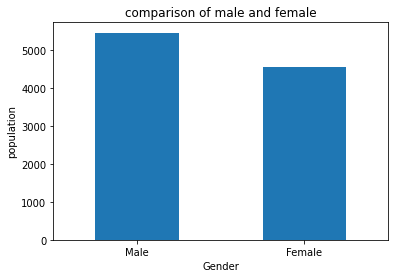

In [100]:
gn=pd.value_counts(df['Gender'], sort = True)
gn.plot(kind='bar',rot=0)
plt.title('comparison of male and female')
plt.xlabel('Gender')
plt.ylabel('population')
plt.show()

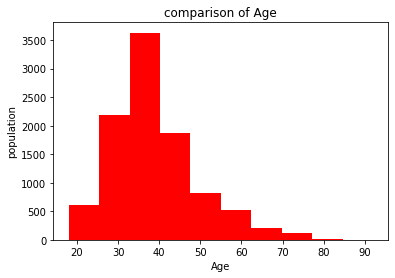

In [101]:
plt.hist(x=df.Age,bins=10,color='red')
plt.title('comparison of Age')
plt.xlabel('Age')
plt.ylabel('population')
plt.show()

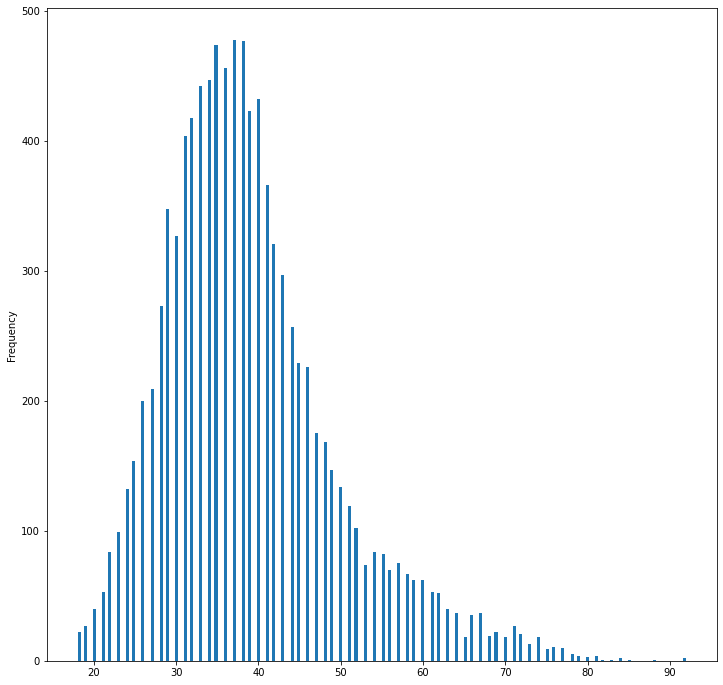

In [102]:
df.Age.plot(kind = 'hist', bins = 200, figsize = (12,12))
plt.show()

## Multi-variate Analysis

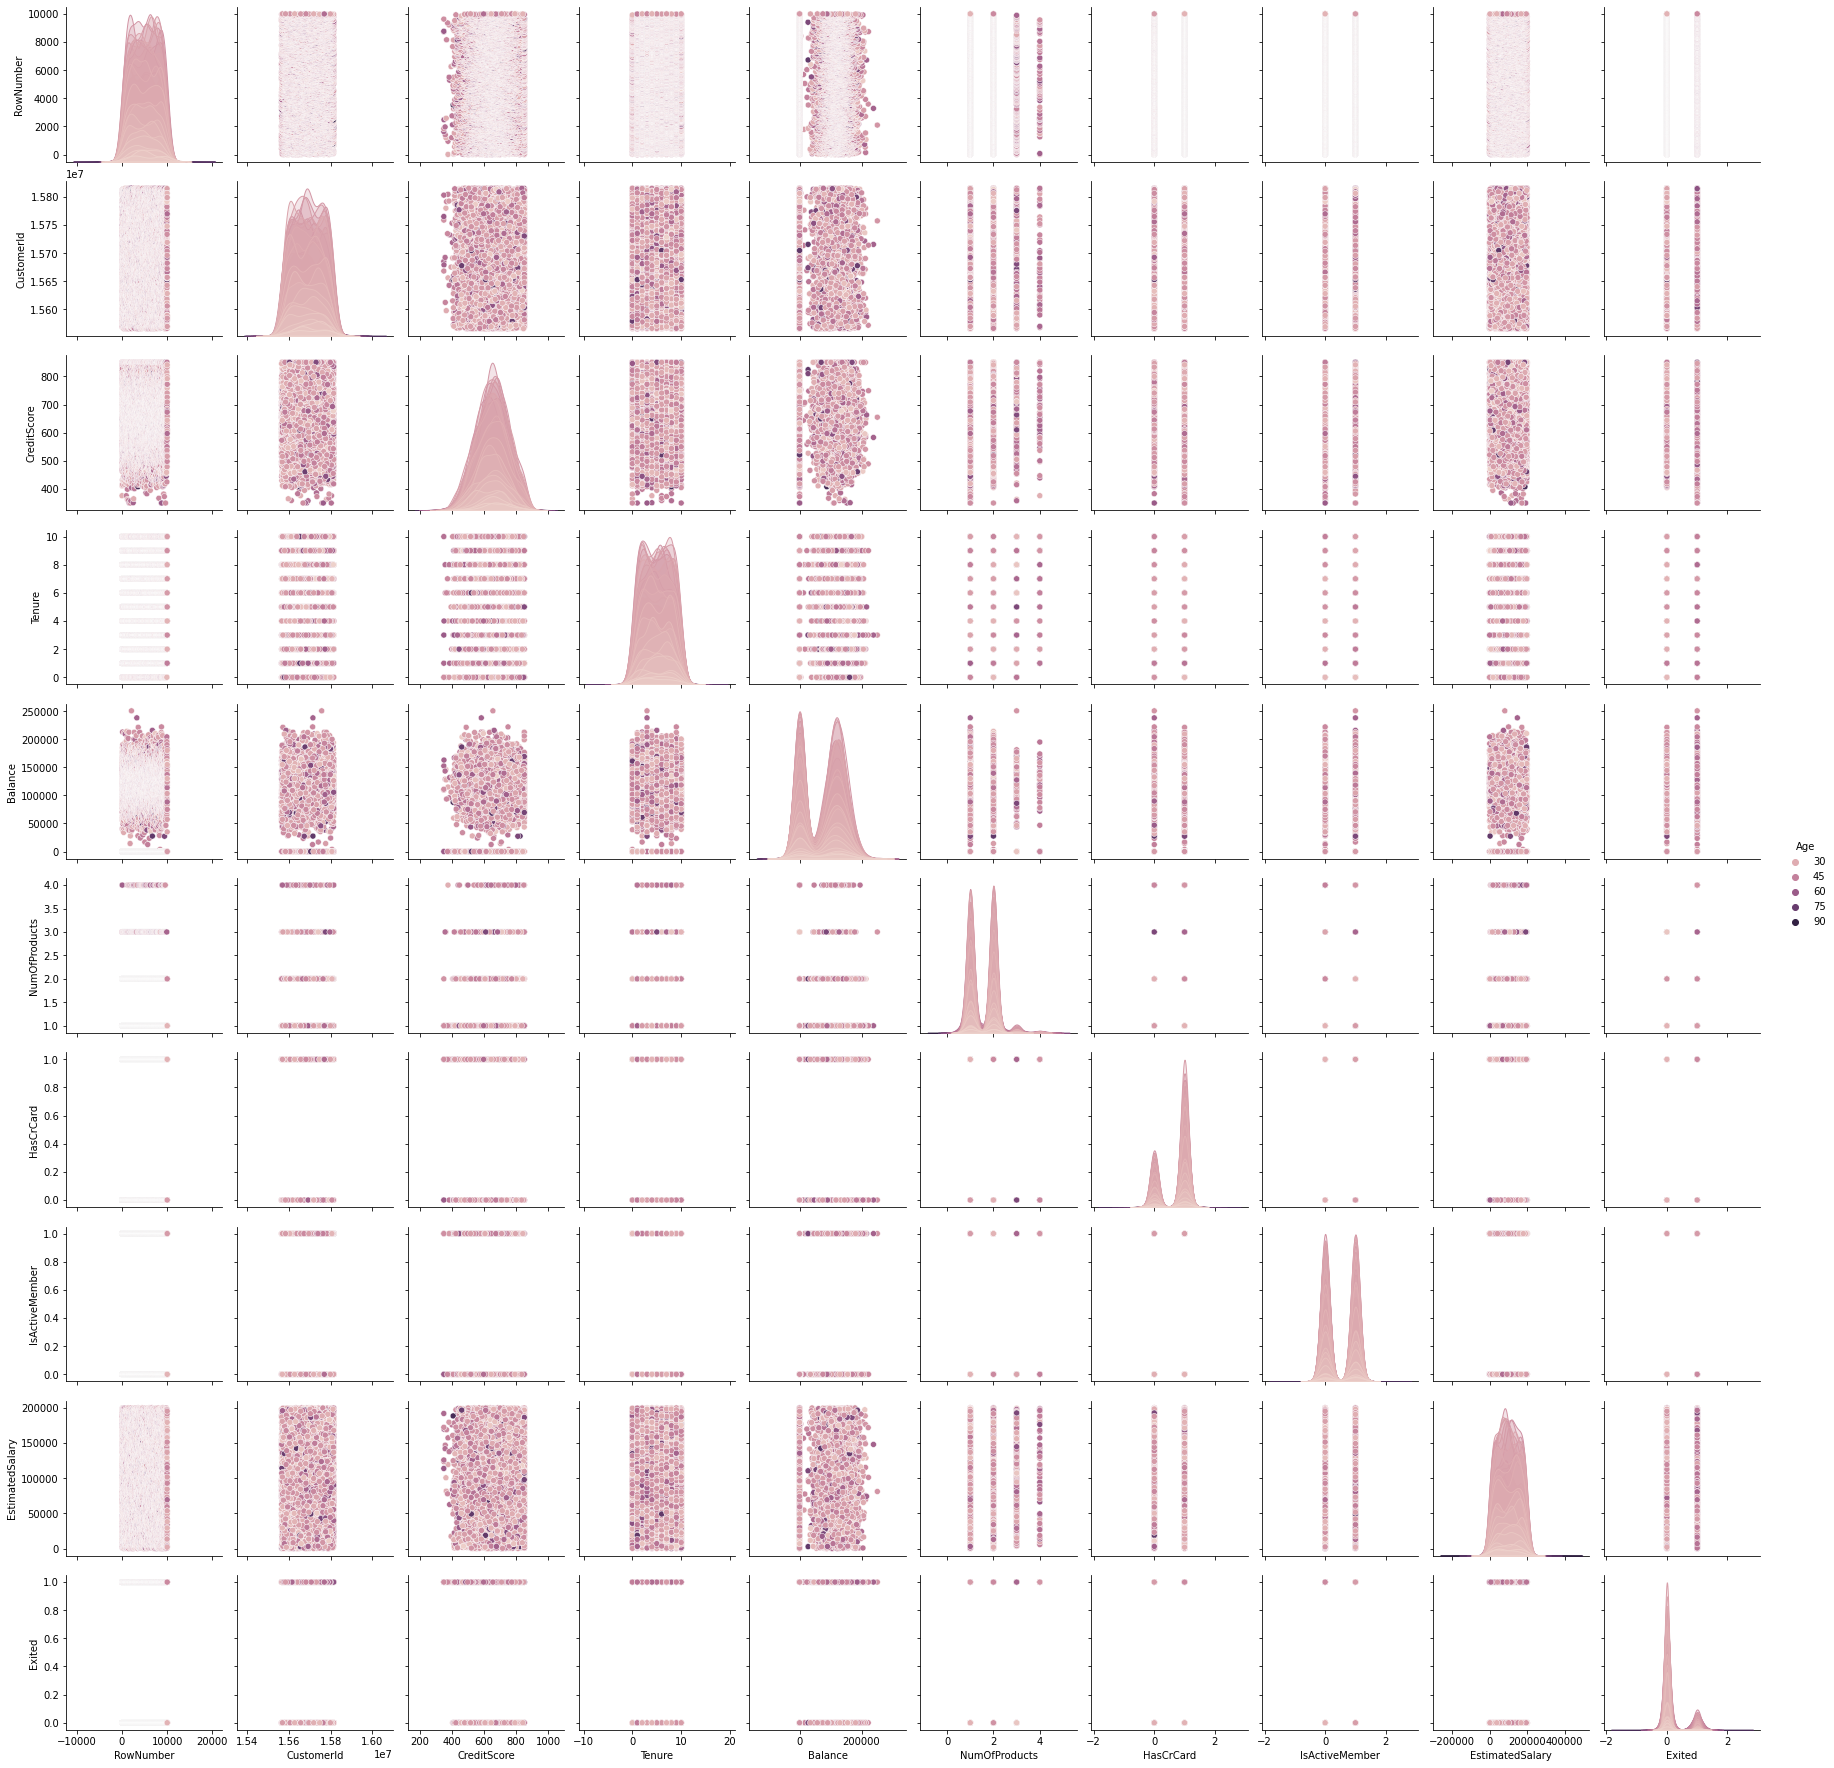

In [103]:
sns.pairplot(df,hue='Age')

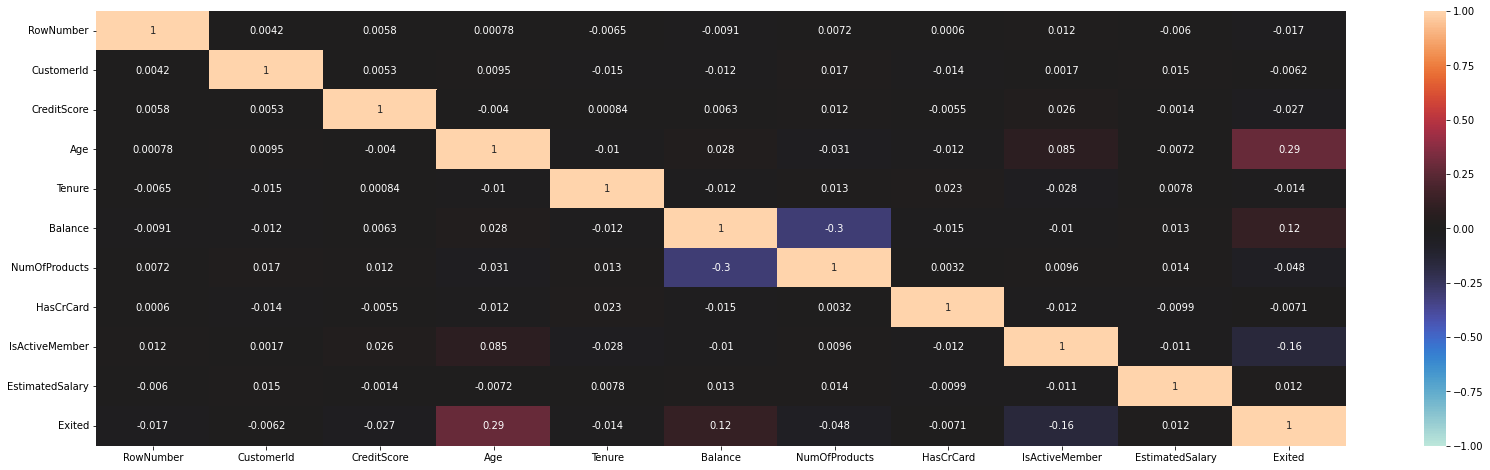

In [104]:
plt.figure(figsize=(28,8))
corr=df.corr()
sns.heatmap(corr,annot=True,vmin=-1, vmax=1, center= 0);

## 3. Descriptive Statistics

In [105]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


## 4.Handling missing value

In [106]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## 5.Finding and Handling the outliers

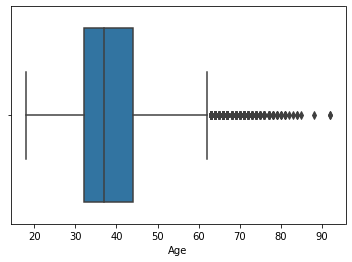

In [107]:
sns.boxplot(x=df['Age'])

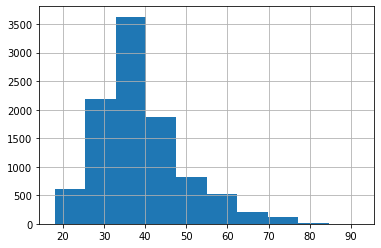

In [108]:
df['Age'].hist()

In [109]:
print('skewness value of Age: ',df['Age'].skew())

skewness value of Age:  1.0113202630234552


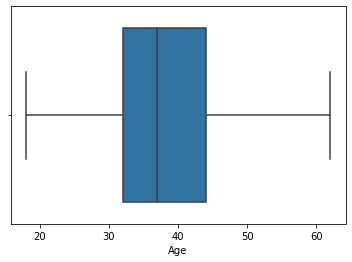

In [110]:
Q1 = df['Age'].quantile(0.25)
Q2 = df['Age'].quantile(0.75)
IQR = Q2 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q2 +(whisker_width*IQR)
df['Age']=np.where(df['Age']>upper_whisker,upper_whisker,np.where(df['Age']<lower_whisker,lower_whisker,df['Age']))
sns.boxplot(x=df['Age'])

## 6.Check for Categorical columns and perform encoding.

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [112]:
from sklearn.preprocessing import LabelEncoder

In [113]:
le = LabelEncoder()

In [114]:
df['Geography'] = le.fit_transform(df['Geography'])

In [115]:
df['Surname'] = le.fit_transform(df['Surname'])

In [116]:
df['Gender']= le.fit_transform(df['Gender'])

In [117]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,2,0,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,0,0,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,0,0,39.0,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,2,0,43.0,2,125510.82,1,1,1,79084.10,0


## 7.Spliting the data into dependent and independent variables.

In [118]:
X = df.iloc[:,3:13]
y = df.iloc[:,13]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42.0,2,0.00,1,1,1,101348.88
1,608,2,0,41.0,1,83807.86,1,0,1,112542.58
2,502,0,0,42.0,8,159660.80,3,1,0,113931.57
3,699,0,0,39.0,1,0.00,2,0,0,93826.63
4,850,2,0,43.0,2,125510.82,1,1,1,79084.10


In [119]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

## 8.Scaling the independent variables

In [120]:
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1))
x_after_min_max_scaler = min_max_scaler.fit_transform(X)
print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)


After min max Scaling : 
 [[0.538      0.         0.         ... 1.         1.         0.50673489]
 [0.516      1.         0.         ... 0.         1.         0.56270874]
 [0.304      0.         0.         ... 1.         0.         0.56965435]
 ...
 [0.718      0.         0.         ... 0.         1.         0.21039009]
 [0.844      0.5        1.         ... 1.         0.         0.46442905]
 [0.884      0.         0.         ... 1.         0.         0.19091423]]


In [121]:
Standardisation = preprocessing.StandardScaler()
x_after_Standardisation = Standardisation.fit_transform(X)
print ("\nAfter Standardisation : \n", x_after_Standardisation)


After Standardisation : 
 [[-0.32622142 -0.90188624 -1.09598752 ...  0.64609167  0.97024255
   0.02188649]
 [-0.44003595  1.51506738 -1.09598752 ... -1.54776799  0.97024255
   0.21653375]
 [-1.53679418 -0.90188624 -1.09598752 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.60498839 -0.90188624 -1.09598752 ... -1.54776799  0.97024255
  -1.00864308]
 [ 1.25683526  0.30659057  0.91241915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 1.46377078 -0.90188624 -1.09598752 ...  0.64609167 -1.03067011
  -1.07636976]]


## 9.Spliting the data into training and testing

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [124]:
x_train.shape , x_test.shape

((7000, 13), (3000, 13))